<a href="https://colab.research.google.com/github/techguy007/food101/blob/main/food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lib

In [16]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from skimage.feature import hog
from skimage import exposure
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss


# Load & preprocess

In [2]:
def load_and_preprocess_data(folder_path):
    data = []
    labels = []

    classes = sorted(os.listdir(folder_path))

    for class_name in classes:
        class_path = os.path.join(folder_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))  # Resize the image to a fixed size

            # Extract HOG features
            features, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8),
                                      cells_per_block=(1, 1), visualize=True, multichannel=False)


            features = hog_image.flatten()

            data.append(features)
            labels.append(classes.index(class_name))

    return np.array(data), np.array(labels)


In [3]:
train_data, train_labels = load_and_preprocess_data('/content/drive/MyDrive/food101/train')
valid_data, valid_labels = load_and_preprocess_data('/content/drive/MyDrive/food101/validate')
test_data, test_labels = load_and_preprocess_data('/content/drive/MyDrive/food101/test')


<ipython-input-2-d24e820e30cc>:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8),


In [4]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
valid_data = scaler.transform(valid_data)
test_data = scaler.transform(test_data)

# Documentation

In [5]:
# General Information on dataset
dataset_name = "Food101"
num_classes = 5  # Assuming 5 classes
class_labels = sorted(os.listdir('/content/drive/MyDrive/food101/train'))
total_samples = len(train_data) + len(valid_data) + len(test_data)
sample_size = (64, 64)  # Assuming image size is 64x64 pixels

# Implementation details:
# Feature extraction phase
num_features = train_data.shape[1]
feature_names = [f"Feature_{i}" for i in range(1, num_features + 1)]
feature_dimension = num_features

In [6]:
print(f"Number of features extracted: {num_features}")
print(f"Feature names: {feature_names}")
print(f"Dimension of resulted features: {feature_dimension}")

Number of features extracted: 4096
Feature names: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49', 'Feature_50', 'Feature_51', 'Feature_52', 'Feature_53', 'Feature_54', 'Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_59', 'Feature_60', 'Feature_61', 'Feature_62', 'Feature_63', 'Feature_64', 'Feature_65', 'Feature_66', 'Feature_67', 'Feature_68', 'Featu

Hyperparameters

In [7]:
learning_rate = 0.001
optimizer = "adam"
regularization = "l2"
batch_size = 32
num_epochs = 10

# Logestic regression  model

In [8]:
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(train_data, train_labels)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
valid_predictions = logistic_regression_model.predict(valid_data)

# Display accuracy

In [18]:
accuracy_lr = accuracy_score(valid_labels, valid_predictions)
print(f'Logistic Regression Validation Accuracy: {accuracy_lr:.4f}')

Logistic Regression Validation Accuracy: 0.2600


# Confusion Matrix

In [19]:
conf_matrix = confusion_matrix(valid_labels, valid_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14 14 22 23 27]
 [24 21 17 19 19]
 [20 19 33 17 11]
 [18 18 20 31 13]
 [18 17 16 18 31]]


# kMeans

In [20]:
kmeans_model = KMeans(n_clusters=num_classes, random_state=42)
kmeans_model.fit(train_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [21]:
valid_cluster_assignments = kmeans_model.predict(valid_data)

In [22]:
cluster_logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
cluster_logistic_regression_model.fit(valid_cluster_assignments.reshape(-1, 1), valid_labels)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
valid_cluster_predictions = cluster_logistic_regression_model.predict(valid_cluster_assignments.reshape(-1, 1))


# Display Validation accuracy

In [24]:
accuracy_combined = accuracy_score(valid_labels, valid_cluster_predictions)
print(f'Combined Model Validation Accuracy: {accuracy_combined:.4f}')

Combined Model Validation Accuracy: 0.2560


Confusion Matrix

In [25]:
conf_matrix_combined = confusion_matrix(valid_labels, valid_cluster_predictions)
print("Confusion Matrix (Combined Model):")
print(conf_matrix_combined)

Confusion Matrix (Combined Model):
[[ 0 50 50  0  0]
 [ 0 63 37  0  0]
 [ 0 35 65  0  0]
 [ 0 57 43  0  0]
 [ 0 48 52  0  0]]


# Applying Model on test Data

In [26]:
test_cluster_assignments = kmeans_model.predict(test_data)
test_cluster_predictions = cluster_logistic_regression_model.predict(test_cluster_assignments.reshape(-1, 1))

# Test accuracy

In [27]:
accuracy_test = accuracy_score(test_labels, test_cluster_predictions)
print(f'Combined Model Test Accuracy: {accuracy_test:.4f}')

Combined Model Test Accuracy: 0.2558


# Confusion Matrix on Test Data

In [28]:
conf_matrix_test = confusion_matrix(test_labels, test_cluster_predictions)
print("Confusion Matrix (Test Set - Combined Model):")
print(conf_matrix_test)

Confusion Matrix (Test Set - Combined Model):
[[  0 146 154   0   0]
 [  0 211  98   0   0]
 [  0 125 175   0   0]
 [  0 162 138   0   0]
 [  0 126 174   0   0]]


# Plot ROC curve for the test model

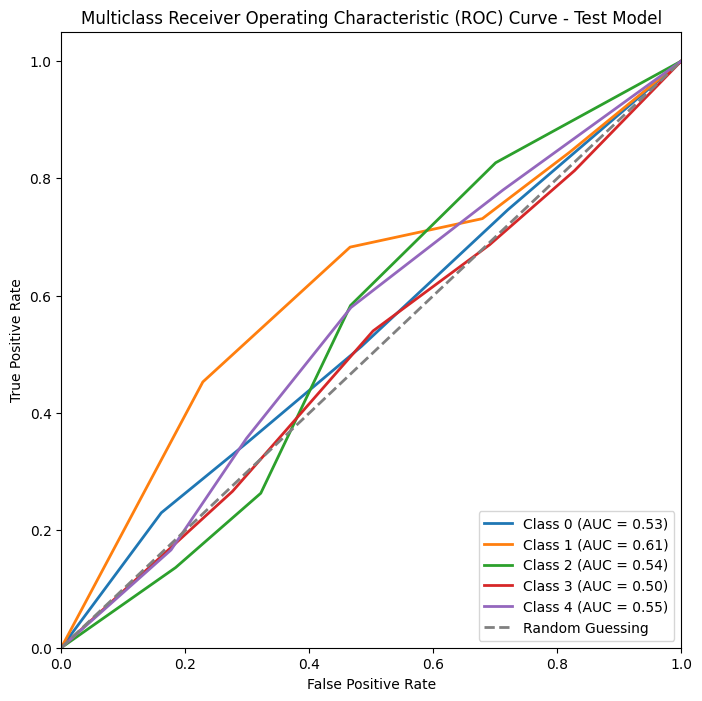

In [31]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming multiclass classification
num_classes = len(np.unique(test_labels))

# Initialize an empty figure
plt.figure(figsize=(8, 8))

# Compute ROC curve and ROC area for each class
for i in range(num_classes):
    binary_test_labels = (test_labels == i).astype(int)
    test_combined_probs = cluster_logistic_regression_model.predict_proba(test_cluster_assignments.reshape(-1, 1))[:, i]
    fpr, tpr, _ = roc_curve(binary_test_labels, test_combined_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', lw=2, label='Random Guessing')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver Operating Characteristic (ROC) Curve - Test Model')
plt.legend(loc="lower right")
plt.show()


# Plot Loss  Curve




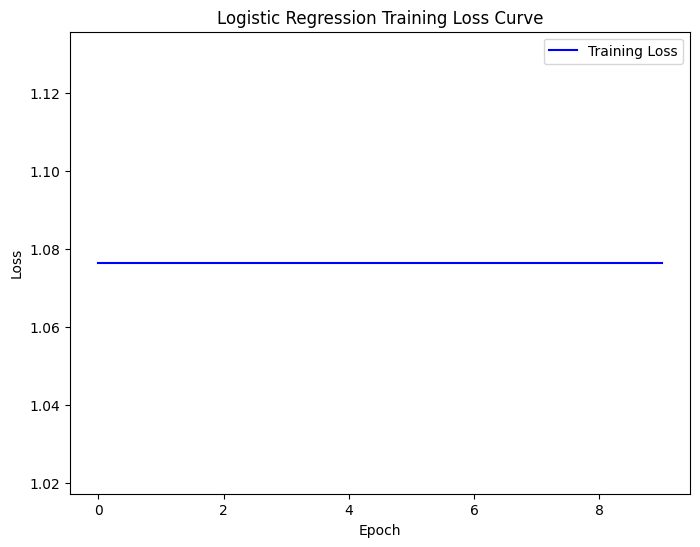

In [15]:
# Logistic Regression Model for Loss Curve
logistic_regression_model_loss = LogisticRegression(max_iter=500, random_state=42, solver='lbfgs', tol=1e-3)

# List to store training loss for each epoch
train_losses_loss_curve = []

for epoch in range(num_epochs):
    logistic_regression_model_loss.fit(train_data, train_labels)
    train_probs = logistic_regression_model_loss.predict_proba(train_data)
    train_loss = -np.mean(np.log(train_probs[np.arange(len(train_labels)), train_labels]))
    train_losses_loss_curve.append(train_loss)

# Plotting the loss curve
plt.figure(figsize=(8, 6))
plt.plot(train_losses_loss_curve, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Logistic Regression Training Loss Curve')
plt.legend()
plt.show()
